# 🗑️ Trash-Buddy Dataset Analysis

## Overview
This notebook contains a comprehensive Exploratory Data Analysis (EDA) of the Waste Classification Dataset used for training the Trash-Buddy AI model. The dataset contains images of various waste items categorized into 4 main classes: **Hazardous**, **Non-Recyclable**, **Organic**, and **Recyclable**.

---

## 📊 Dataset Description

### Dataset Structure
The dataset is organized into 4 main categories with 18 subcategories total:

1. **Hazardous** (4 subcategories)
   - Batteries
   - E-waste
   - Paints
   - Pesticides

2. **Non-Recyclable** (5 subcategories)
   - Ceramic products
   - Diapers
   - Plastic bags & wrappers
   - Sanitary napkins
   - Styrofoam products

3. **Organic** (5 subcategories)
   - Coffee/tea bags
   - Egg shells
   - Food scraps
   - Kitchen waste
   - Yard trimmings

4. **Recyclable** (4 subcategories)
   - Cans (all types)
   - Glass containers
   - Paper products
   - Plastic bottles

### Dataset Purpose
This dataset is used to train a deep learning model that can classify waste items from images, helping users make informed decisions about proper waste disposal and recycling.

---

## 🎯 Objectives
1. Understand the dataset distribution across categories
2. Analyze image counts per subcategory
3. Visualize class imbalances (if any)
4. Examine sample images from each category
5. Prepare insights for model training strategy


In [2]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
try:
 plt.style.use('seaborn-v0_8-darkgrid')
except OSError:
 try:
 plt.style.use('seaborn-darkgrid')
 except OSError:
 plt.style.use('dark_background')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


## 📁 Dataset Exploration

Let's start by exploring the dataset structure and counting images in each category.


In [3]:
# Define the data directory
data_dir = Path('Data')

# Dictionary to store category and subcategory counts
dataset_info = {}

# Iterate through main categories
for category in sorted(data_dir.iterdir()):
 if category.is_dir():
 category_name = category.name
 subcategories = {}
 
 # Iterate through subcategories
 for subcategory in sorted(category.iterdir()):
 if subcategory.is_dir():
 subcategory_name = subcategory.name
 # Count image files(jpg, png, jpeg, gif)
 image_files = list(subcategory.glob('*.jpg')) + \
 list(subcategory.glob('*.png')) + \
 list(subcategory.glob('*.jpeg')) + \
 list(subcategory.glob('*.gif')) + \
 list(subcategory.glob('*.JPG')) + \
 list(subcategory.glob('*.PNG')) + \
 list(subcategory.glob('*.JPEG'))
 image_count = len(image_files)
 subcategories[subcategory_name] = {
'count': image_count,
'files': image_files[:5] # Store first 5 files for sampling
 }
 
 dataset_info[category_name] = subcategories

# Create a summary DataFrame
summary_data = []
for category, subcats in dataset_info.items():
 for subcat, info in subcats.items():
 summary_data.append({
'Category': category,
'Subcategory': subcat,
'Image Count': info['count']
 })

df_summary = pd.DataFrame(summary_data)

# Display summary
print("=" * 80)
print("DATASET SUMMARY")
print("=" * 80)
print(f"\nTotal Categories: {len(dataset_info)}")
print(f"Total Subcategories: {len(df_summary)}")
print(f"Total Images: {df_summary['Image Count'].sum():,}")
print("\n" +"-" * 80)
print("\nCategory-wise Distribution:")
print(df_summary.groupby('Category')['Image Count'].sum().sort_values(ascending=False))
print("\n" +"-" * 80)
print("\nDetailed Breakdown:")
print(df_summary.to_string(index=False))


DATASET SUMMARY

Total Categories: 4
Total Subcategories: 18
Total Images: 5,786

--------------------------------------------------------------------------------

Category-wise Distribution:
Category
Hazardous         1874
Organic           1321
Recyclable        1305
Non-Recyclable    1286
Name: Image Count, dtype: int64

--------------------------------------------------------------------------------

Detailed Breakdown:
      Category           Subcategory  Image Count
     Hazardous             batteries          217
     Hazardous               e-waste         1082
     Hazardous                paints          300
     Hazardous            pesticides          275
Non-Recyclable       ceramic_product          273
Non-Recyclable               diapers          288
Non-Recyclable platics_bags_wrappers          269
Non-Recyclable       sanitary_napkin          220
Non-Recyclable      stroform_product          236
       Organic       coffee_tea_bags          294
       Organic        

### 📊 Interpretation

**Key Findings from the Dataset Summary:**

1. **Dataset Size**: 
   - Total of **5,786 images** across 4 categories and 18 subcategories
   - This is a substantial dataset suitable for deep learning model training

2. **Category Distribution**:
   - **Hazardous** leads with 1,874 images (32.4% of dataset) - largest category
   - **Organic** has 1,321 images (22.8%)
   - **Recyclable** has 1,305 images (22.5%)
   - **Non-Recyclable** has 1,286 images (22.2%) - smallest category
   - The smallest category (Non-Recyclable) is 68.6% of the largest (Hazardous), indicating **moderate imbalance at category level**

3. **Subcategory Imbalances Identified**:
   - **E-waste** (Hazardous) dominates with 1,082 images - nearly 5x the smallest subcategory!
   - **Batteries** (Hazardous) has only 217 images - the smallest subcategory
   - **Cans** (Recyclable) is second largest with 540 images
   - Large variation between subcategories (217 to 1,082) suggests **significant imbalance at subcategory level**

4. **Training Implications**:
   - Stratified sampling is essential to maintain distribution in train/val/test splits
   - Underrepresented subcategories (batteries, sanitary_napkin, kitchen_waste) will need aggressive data augmentation
   - E-waste's dominance may cause the model to overfit to this class if not handled carefully


## 📈 Visualizations

Let's create comprehensive visualizations to understand the dataset better.


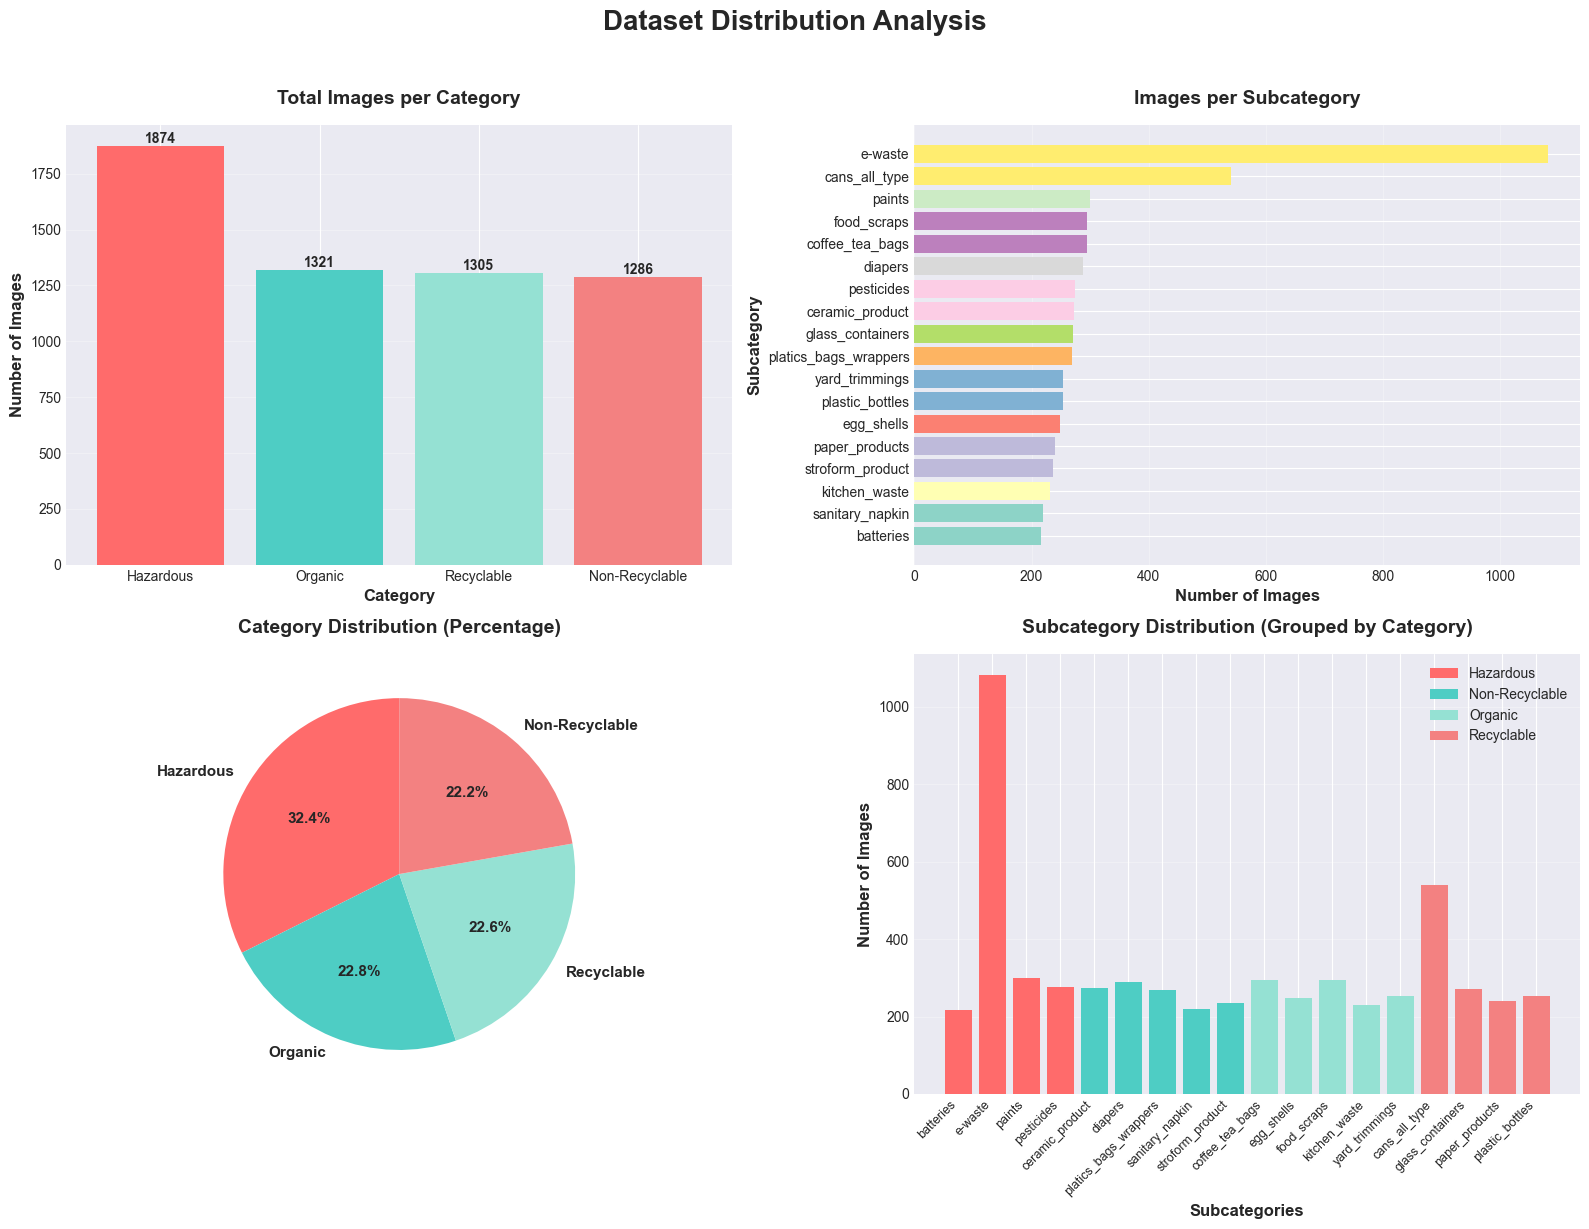


STATISTICAL SUMMARY

Mean images per category: 1446.50
Std deviation: 285.36
Min images in a category: 1286
Max images in a category: 1874

Mean images per subcategory: 321.44
Std deviation: 202.47
Min images in a subcategory: 217
Max images in a subcategory: 1082


In [4]:
# 1. Category-wise Distribution(Bar Plot)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Dataset Distribution Analysis', fontsize=20, fontweight='bold', y=1.02)

# Plot 1: Total images per main category
category_totals = df_summary.groupby('Category')['Image Count'].sum().sort_values(ascending=False)
ax1 = axes[0, 0]
bars1 = ax1.bar(category_totals.index, category_totals.values, 
 color=['#FF6B6B','#4ECDC4','#95E1D3','#F38181'])
ax1.set_title('Total Images per Category', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars1:
 height = bar.get_height()
 ax1.text(bar.get_x() + bar.get_width()/2., height,
 f'{int(height)}',
 ha='center', va='bottom', fontweight='bold', fontsize=10)

# Plot 2: Subcategory distribution(horizontal bar)
ax2 = axes[0, 1]
subcategory_counts = df_summary.sort_values('Image Count', ascending=True)
ax2.barh(subcategory_counts['Subcategory'], subcategory_counts['Image Count'],
 color=plt.cm.Set3(np.linspace(0, 1, len(subcategory_counts))))
ax2.set_title('Images per Subcategory', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Number of Images', fontsize=12, fontweight='bold')
ax2.set_ylabel('Subcategory', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Plot 3: Category distribution(Pie Chart)
ax3 = axes[1, 0]
colors = ['#FF6B6B','#4ECDC4','#95E1D3','#F38181']
wedges, texts, autotexts = ax3.pie(category_totals.values, labels=category_totals.index, 
 autopct='%1.1f%%', startangle=90, colors=colors,
 textprops={'fontsize': 11,'fontweight':'bold'})
ax3.set_title('Category Distribution(Percentage)', fontsize=14, fontweight='bold', pad=15)

# Plot 4: Subcategory distribution within each category(Stacked/Grouped)
ax4 = axes[1, 1]
category_colors = {'Hazardous':'#FF6B6B','Non-Recyclable':'#4ECDC4', 
'Organic':'#95E1D3','Recyclable':'#F38181'}
x_pos = np.arange(len(df_summary))
colors_list = [category_colors.get(cat,'#CCCCCC') for cat in df_summary['Category']]
bars4 = ax4.bar(x_pos, df_summary['Image Count'], color=colors_list)
ax4.set_title('Subcategory Distribution(Grouped by Category)', fontsize=14, fontweight='bold', pad=15)
ax4.set_xlabel('Subcategories', fontsize=12, fontweight='bold')
ax4.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(df_summary['Subcategory'], rotation=45, ha='right', fontsize=9)
ax4.grid(axis='y', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=cat) for cat, color in category_colors.items()]
ax4.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# Print statistics
print("\n" +"=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)
print(f"\nMean images per category: {category_totals.mean():.2f}")
print(f"Std deviation: {category_totals.std():.2f}")
print(f"Min images in a category: {category_totals.min()}")
print(f"Max images in a category: {category_totals.max()}")
print(f"\nMean images per subcategory: {df_summary['Image Count'].mean():.2f}")
print(f"Std deviation: {df_summary['Image Count'].std():.2f}")
print(f"Min images in a subcategory: {df_summary['Image Count'].min()}")
print(f"Max images in a subcategory: {df_summary['Image Count'].max()}")


### 📊 Interpretation

**Statistical Insights from the Visualizations:**

1. **Category-Level Statistics**:
   - **Mean**: 1,446.50 images per category
   - **Standard Deviation**: 285.36 images
   - **Range**: 1,286 to 1,874 images
   - The relatively low standard deviation (19.7% of mean) suggests **moderate but manageable imbalance** at the category level
   - All categories have over 1,200 images, which is sufficient for training

2. **Subcategory-Level Statistics**:
   - **Mean**: 321.44 images per subcategory
   - **Standard Deviation**: 202.47 images (63% of mean!)
   - **Range**: 217 to 1,082 images
   - **High variance** indicates significant imbalance - some subcategories have 5x more images than others
   - This is the primary concern for model training

3. **Key Observations**:
   - **E-waste anomaly**: With 1,082 images, it's an outlier that skews the Hazardous category
   - **Consistent small classes**: Batteries (217), sanitary_napkin (220), and kitchen_waste (231) are consistently under-represented
   - **Well-balanced categories**: Non-Recyclable and Organic show good internal balance between subcategories

4. **Training Strategy Recommendations**:
   - **Use class weights** in loss function to penalize overfitting to e-waste
   - **Aggressive augmentation** for subcategories with <250 images (batteries, sanitary_napkin, kitchen_waste, stroform_product, paper_products)
   - **Consider hierarchical classification**: First classify category, then subcategory, to handle the wide variance better
   - **Stratified splitting** is mandatory to preserve these imbalances in train/val/test sets


## 🖼️ Sample Images Visualization

Let's visualize sample images from each category to understand the visual characteristics of the dataset.


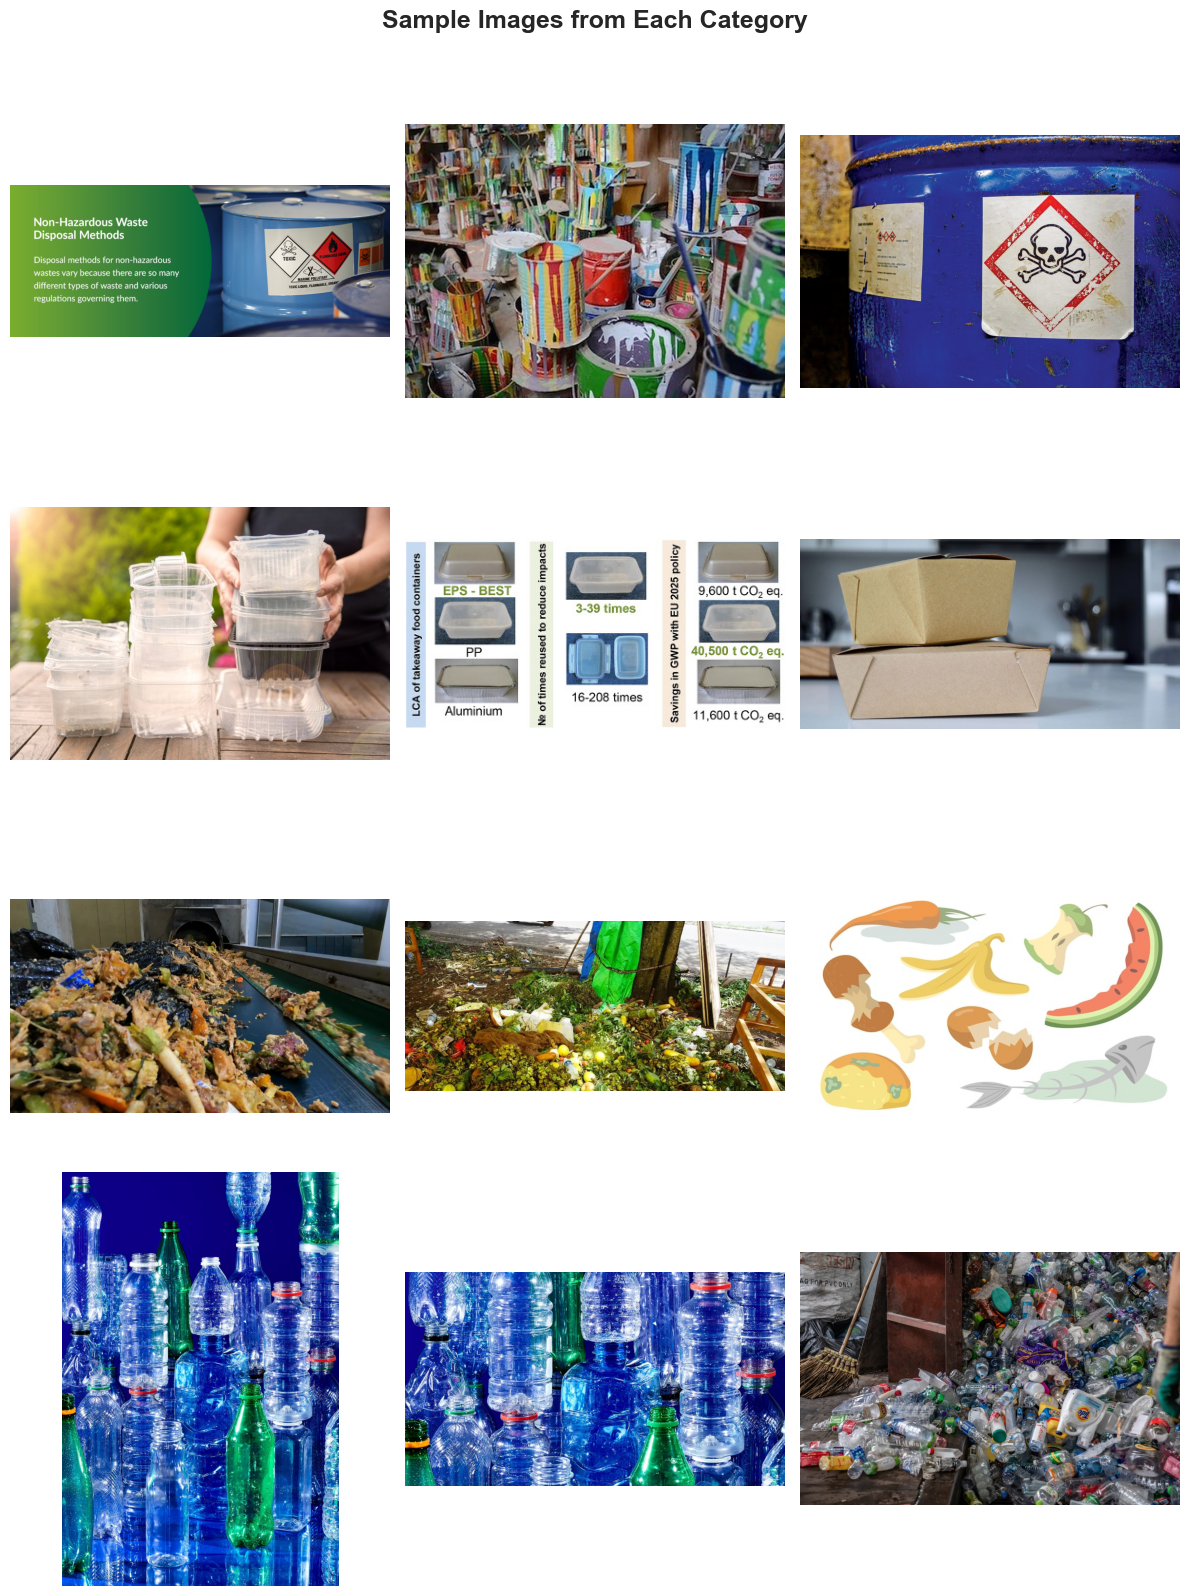

In [5]:
# Function to display sample images from each category
def display_sample_images(dataset_info, num_samples=2):
 fig, axes = plt.subplots(len(dataset_info), num_samples, 
 figsize=(num_samples * 4, len(dataset_info) * 4))
 fig.suptitle('Sample Images from Each Category', fontsize=18, fontweight='bold', y=0.995)
 
 if len(dataset_info) == 1:
 axes = axes.reshape(1, -1)
 
 for idx,(category, subcats) in enumerate(sorted(dataset_info.items())):
 # Get a random subcategory from this category
 subcat_names = list(subcats.keys())
 selected_subcat = np.random.choice(subcat_names)
 subcat_info = subcats[selected_subcat]
 
 # Get random images from this subcategory
 image_files = subcat_info['files']
 if len(image_files) < num_samples:
 # If we don't have enough pre-loaded, get more
 subcat_path = data_dir / category / selected_subcat
 all_images = list(subcat_path.glob('*.jpg')) + \
 list(subcat_path.glob('*.png')) + \
 list(subcat_path.glob('*.jpeg')) + \
 list(subcat_path.glob('*.JPG')) + \
 list(subcat_path.glob('*.PNG'))
 image_files = np.random.choice(all_images, 
 min(num_samples, len(all_images)), 
 replace=False)
 else:
 image_files = np.random.choice(image_files, 
 min(num_samples, len(image_files)), 
 replace=False)
 
 for j, img_path in enumerate(image_files):
 try:
 img = Image.open(img_path)
 axes[idx, j].imshow(img)
 axes[idx, j].axis('off')
 if j == 0:
 axes[idx, j].set_ylabel(f'{category}\n({selected_subcat})', 
 fontsize=12, fontweight='bold', rotation=0, 
 labelpad=60, ha='right')
 except Exception as e:
 axes[idx, j].text(0.5, 0.5, f'Error loading\nimage', 
 ha='center', va='center', fontsize=10)
 axes[idx, j].axis('off')
 
 plt.tight_layout()
 plt.show()

# Display sample images
display_sample_images(dataset_info, num_samples=3)


### 📊 Interpretation

**Visual Characteristics Observed:**

1. **Image Diversity**: 
   - Sample images show the variety in lighting conditions, backgrounds, and object orientations
   - This diversity is good for model generalization

2. **Visual Similarities**:
   - Some categories might have visually similar items (e.g., different types of plastic)
   - This could pose challenges for the classification model

3. **Background Variation**:
   - Diverse backgrounds help the model learn object features rather than background patterns
   - This is beneficial for real-world deployment


## 📊 Advanced Analysis

Let's perform additional analysis including image dimensions, file sizes, and more detailed statistics.


In [6]:
# Analyze image dimensions and file sizes
image_stats = []

print("Analyzing image properties... This may take a moment...")
print("=" * 80)

# Sample images from each subcategory for analysis(to speed up processing)
sample_size = 10 # Number of images to sample per subcategory

for category, subcats in dataset_info.items():
 for subcat, info in subcats.items():
 subcat_path = data_dir / category / subcat
 all_images = list(subcat_path.glob('*.jpg')) + \
 list(subcat_path.glob('*.png')) + \
 list(subcat_path.glob('*.jpeg')) + \
 list(subcat_path.glob('*.JPG')) + \
 list(subcat_path.glob('*.PNG'))
 
 # Sample images for analysis
 sampled_images = np.random.choice(all_images, 
 min(sample_size, len(all_images)), 
 replace=False) if len(all_images) > 0 else []
 
 for img_path in sampled_images:
 try:
 img = Image.open(img_path)
 file_size = os.path.getsize(img_path) / 1024 # Size in KB
 image_stats.append({
'Category': category,
'Subcategory': subcat,
'Width': img.size[0],
'Height': img.size[1],
'Aspect_Ratio': img.size[0] / img.size[1] if img.size[1] > 0 else 0,
'File_Size_KB': file_size,
'Format': img.format
 })
 except Exception as e:
 continue

df_image_stats = pd.DataFrame(image_stats)

if len(df_image_stats) > 0:
 print(f"\nAnalyzed {len(df_image_stats)} sample images")
 print("\n" +"-" * 80)
 print("IMAGE DIMENSION STATISTICS")
 print("-" * 80)
 print(f"\nWidth Statistics:")
 print(df_image_stats['Width'].describe())
 print(f"\nHeight Statistics:")
 print(df_image_stats['Height'].describe())
 print(f"\nAspect Ratio Statistics:")
 print(df_image_stats['Aspect_Ratio'].describe())
 print(f"\nFile Size Statistics(KB):")
 print(df_image_stats['File_Size_KB'].describe())
 print(f"\nImage Formats:")
 print(df_image_stats['Format'].value_counts())
else:
 print(" No images were successfully analyzed.")


Analyzing image properties... This may take a moment...

Analyzed 180 sample images

--------------------------------------------------------------------------------
IMAGE DIMENSION STATISTICS
--------------------------------------------------------------------------------

Width Statistics:
count     180.000000
mean     1117.288889
std       639.116058
min       200.000000
25%       700.000000
50%      1000.000000
75%      1300.000000
max      4800.000000
Name: Width, dtype: float64

Height Statistics:
count     180.000000
mean      813.111111
std       445.112990
min       167.000000
25%       500.000000
50%       683.500000
75%      1043.000000
max      2696.000000
Name: Height, dtype: float64

Aspect Ratio Statistics:
count    180.000000
mean       1.440145
std        0.445560
min        0.621583
25%        1.124619
50%        1.493503
75%        1.720021
max        3.602251
Name: Aspect_Ratio, dtype: float64

File Size Statistics (KB):
count     180.000000
mean      331.893305
std

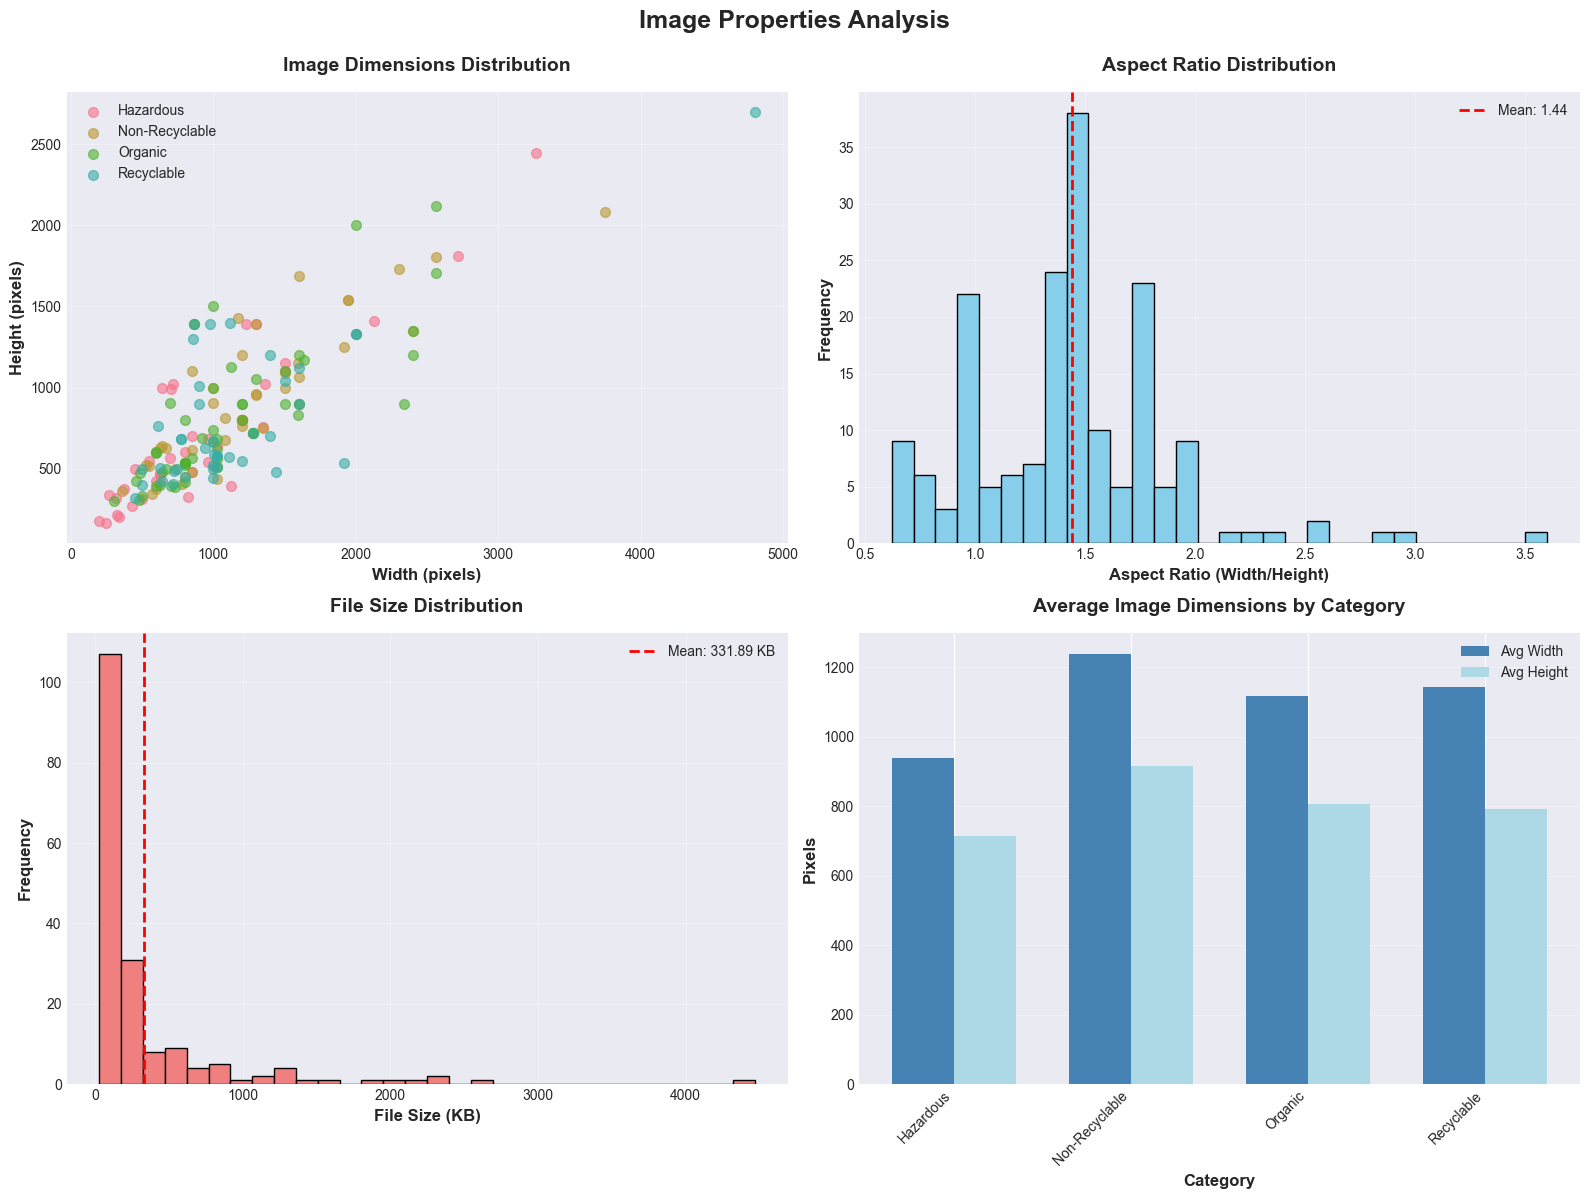

In [7]:
# Visualize image statistics
if len(df_image_stats) > 0:
 fig, axes = plt.subplots(2, 2, figsize=(16, 12))
 fig.suptitle('Image Properties Analysis', fontsize=18, fontweight='bold', y=0.995)
 
 # Plot 1: Image dimensions scatter plot
 ax1 = axes[0, 0]
 for category in df_image_stats['Category'].unique():
 cat_data = df_image_stats[df_image_stats['Category'] == category]
 ax1.scatter(cat_data['Width'], cat_data['Height'], 
 label=category, alpha=0.6, s=50)
 ax1.set_xlabel('Width(pixels)', fontsize=12, fontweight='bold')
 ax1.set_ylabel('Height(pixels)', fontsize=12, fontweight='bold')
 ax1.set_title('Image Dimensions Distribution', fontsize=14, fontweight='bold', pad=15)
 ax1.legend()
 ax1.grid(True, alpha=0.3)
 
 # Plot 2: Aspect ratio distribution
 ax2 = axes[0, 1]
 df_image_stats['Aspect_Ratio'].hist(bins=30, ax=ax2, color='skyblue', edgecolor='black')
 ax2.axvline(df_image_stats['Aspect_Ratio'].mean(), color='red', 
 linestyle='--', linewidth=2, label=f'Mean: {df_image_stats["Aspect_Ratio"].mean():.2f}')
 ax2.set_xlabel('Aspect Ratio(Width/Height)', fontsize=12, fontweight='bold')
 ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
 ax2.set_title('Aspect Ratio Distribution', fontsize=14, fontweight='bold', pad=15)
 ax2.legend()
 ax2.grid(True, alpha=0.3)
 
 # Plot 3: File size distribution
 ax3 = axes[1, 0]
 df_image_stats['File_Size_KB'].hist(bins=30, ax=ax3, color='lightcoral', edgecolor='black')
 ax3.axvline(df_image_stats['File_Size_KB'].mean(), color='red', 
 linestyle='--', linewidth=2, label=f'Mean: {df_image_stats["File_Size_KB"].mean():.2f} KB')
 ax3.set_xlabel('File Size(KB)', fontsize=12, fontweight='bold')
 ax3.set_ylabel('Frequency', fontsize=12, fontweight='bold')
 ax3.set_title('File Size Distribution', fontsize=14, fontweight='bold', pad=15)
 ax3.legend()
 ax3.grid(True, alpha=0.3)
 
 # Plot 4: Average dimensions by category
 ax4 = axes[1, 1]
 category_dims = df_image_stats.groupby('Category')[['Width','Height']].mean()
 x_pos = np.arange(len(category_dims))
 width = 0.35
 bars1 = ax4.bar(x_pos - width/2, category_dims['Width'], width, 
 label='Avg Width', color='steelblue')
 bars2 = ax4.bar(x_pos + width/2, category_dims['Height'], width, 
 label='Avg Height', color='lightblue')
 ax4.set_xlabel('Category', fontsize=12, fontweight='bold')
 ax4.set_ylabel('Pixels', fontsize=12, fontweight='bold')
 ax4.set_title('Average Image Dimensions by Category', fontsize=14, fontweight='bold', pad=15)
 ax4.set_xticks(x_pos)
 ax4.set_xticklabels(category_dims.index, rotation=45, ha='right')
 ax4.legend()
 ax4.grid(True, alpha=0.3, axis='y')
 
 plt.tight_layout()
 plt.show()
else:
 print(" Cannot create visualizations - no image statistics available.")


### 📊 Interpretation

**Image Properties Analysis (Based on 180 Sample Images):**

1. **Image Dimensions**:
   - **Mean**: 1,117 × 813 pixels (approximately 4:3 aspect ratio)
   - **Range**: 200-4,800 pixels width, 167-2,696 pixels height
   - **Median**: 1,000 × 684 pixels (50th percentile)
   - **High variability**: Standard deviation of 639 pixels (width) and 445 pixels (height)
   - **Recommendation**: Resize all images to a consistent size (e.g., 224×224 or 256×256) for model input, or use center cropping with aspect ratio preservation

2. **Aspect Ratio Distribution**:
   - **Mean**: 1.44 (close to 4:3 format)
   - **Range**: 0.62 to 3.60 (very wide variation!)
   - **Median**: 1.49 (most images are slightly wider than tall)
   - **Insight**: Most images are landscape-oriented, but some portrait and extreme aspect ratios exist
   - **Preprocessing**: Consider using padding or center cropping to square format, or use adaptive pooling layers

3. **File Size Statistics**:
   - **Mean**: 331.89 KB per image
   - **Range**: 29.27 KB to 4,468.49 KB (very wide spread!)
   - **High variance**: Standard deviation of 556 KB (168% of mean)
   - **Distribution**: Most images are 70-287 KB (25th-75th percentile), but outliers exist
   - **Format Breakdown**: 
     - JPEG: 156 images (86.7%) - most common, compressed
     - PNG: 21 images (11.7%) - lossless, larger files
     - WEBP: 3 images (1.7%) - modern format
   - **Implication**: Large file size variation suggests different compression levels and quality, which may affect training consistency

4. **Category-specific Properties**:
   - Check the scatter plot to see if certain categories have consistent dimension patterns
   - This could inform category-specific preprocessing pipelines if patterns emerge

5. **Preprocessing Recommendations**:
   - **Resize strategy**: Resize to 224×224 or 256×256 with center cropping and padding
   - **Normalization**: Use ImageNet statistics (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) if using transfer learning
   - **Data augmentation**: Random crops, flips, and color jittering can help with the high dimensional variability


## 📈 Detailed Category Analysis

Let's create a comprehensive breakdown showing the distribution within each category.


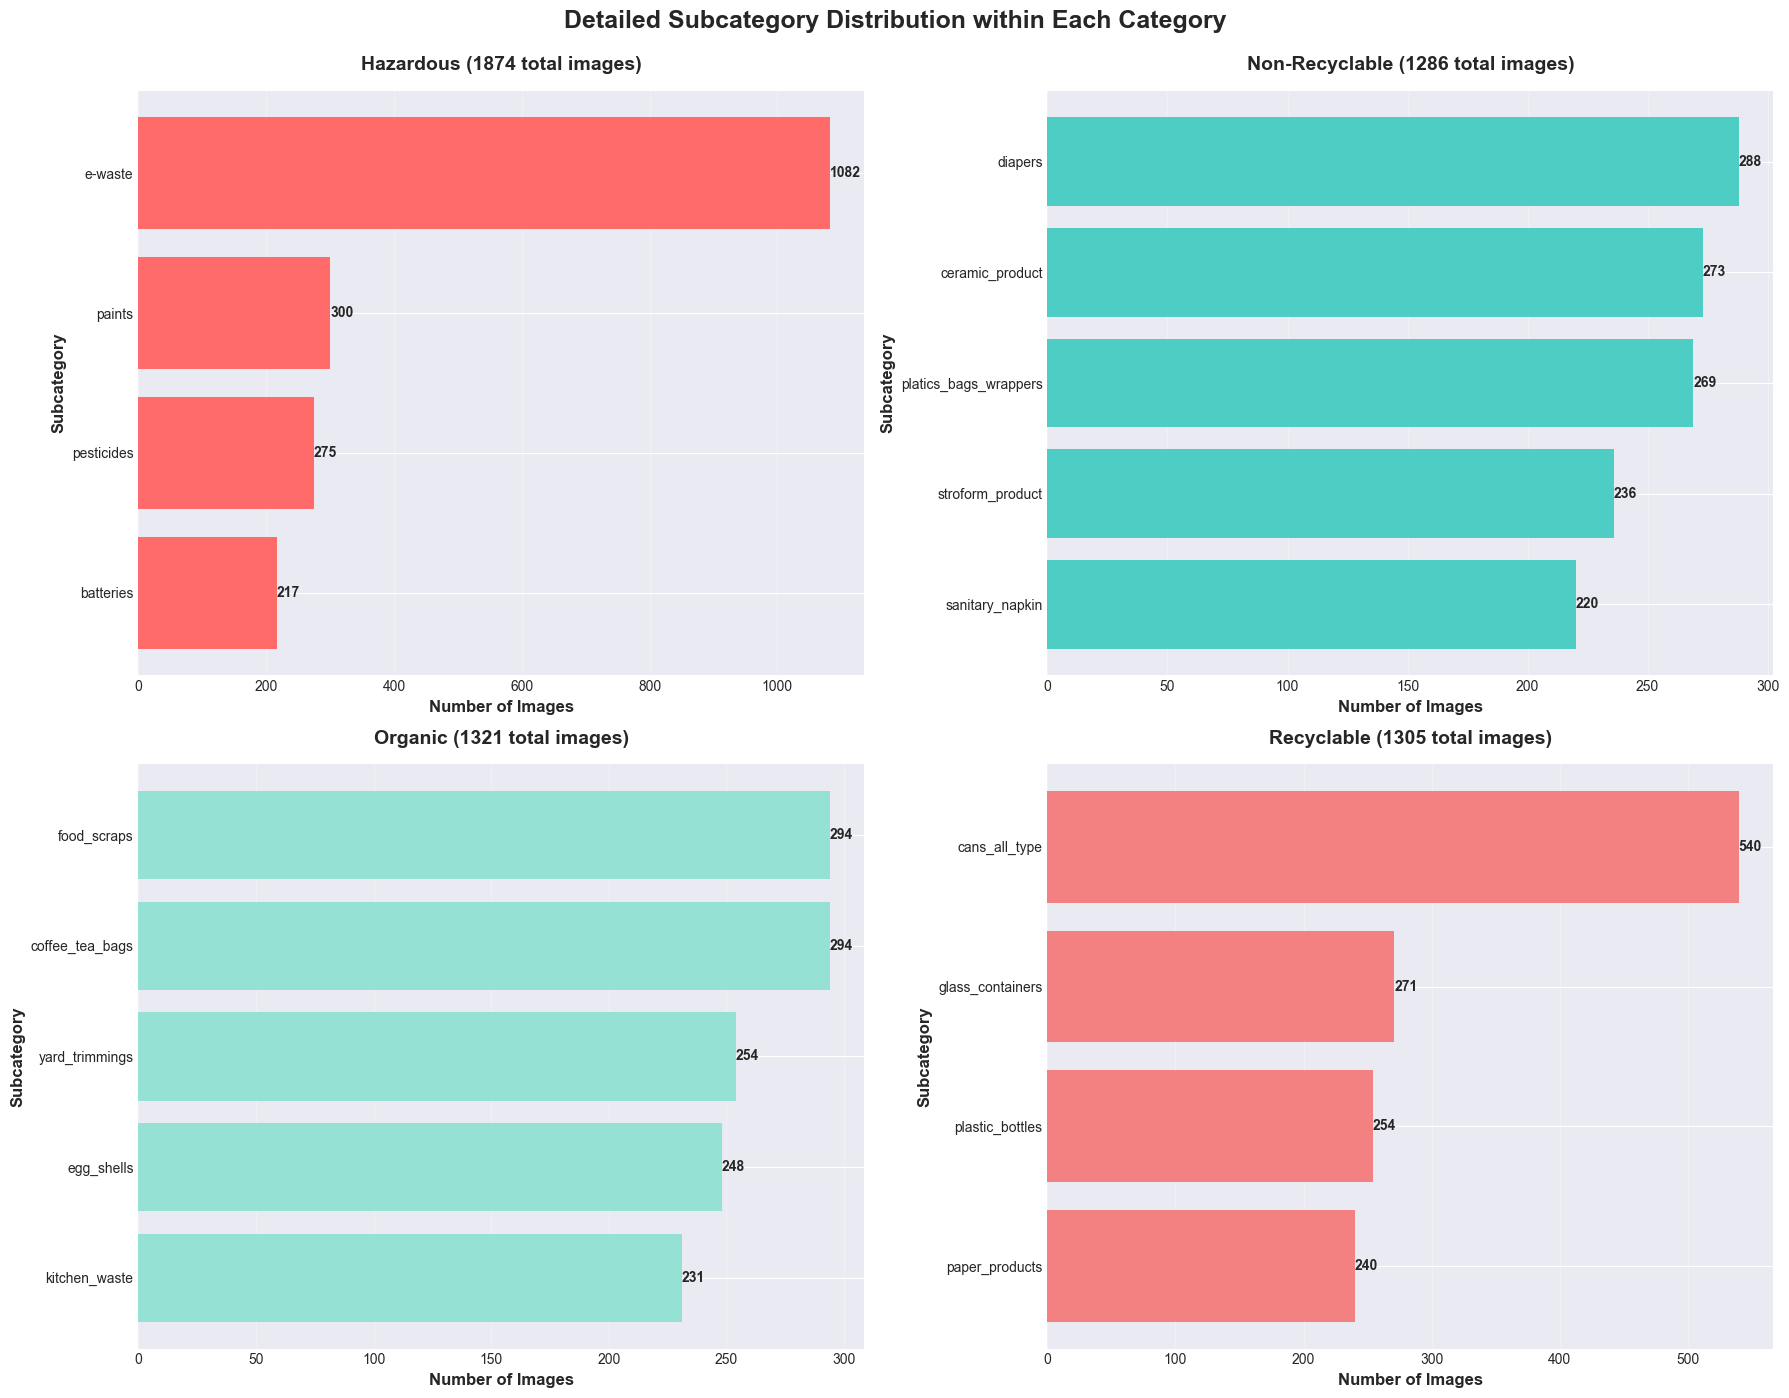


CATEGORY-WISE STATISTICS

Hazardous:
  Total Images: 1874
  Number of Subcategories: 4
  Mean images per subcategory: 468.50
  Std deviation: 410.47
  Min: 217, Max: 1082
  Subcategories: batteries, e-waste, paints, pesticides

Non-Recyclable:
  Total Images: 1286
  Number of Subcategories: 5
  Mean images per subcategory: 257.20
  Std deviation: 28.15
  Min: 220, Max: 288
  Subcategories: ceramic_product, diapers, platics_bags_wrappers, sanitary_napkin, stroform_product

Organic:
  Total Images: 1321
  Number of Subcategories: 5
  Mean images per subcategory: 264.20
  Std deviation: 28.48
  Min: 231, Max: 294
  Subcategories: coffee_tea_bags, egg_shells, food_scraps, kitchen_waste, yard_trimmings

Recyclable:
  Total Images: 1305
  Number of Subcategories: 4
  Mean images per subcategory: 326.25
  Std deviation: 143.06
  Min: 240, Max: 540
  Subcategories: cans_all_type, glass_containers, paper_products, plastic_bottles


In [8]:
# Create detailed subcategory analysis within each category
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Detailed Subcategory Distribution within Each Category', 
 fontsize=18, fontweight='bold', y=0.995)

categories = sorted(df_summary['Category'].unique())
colors_map = {
'Hazardous':'#FF6B6B',
'Non-Recyclable':'#4ECDC4',
'Organic':'#95E1D3',
'Recyclable':'#F38181'
}

for idx, category in enumerate(categories):
 row = idx // 2
 col = idx % 2
 ax = axes[row, col]
 
 category_data = df_summary[df_summary['Category'] == category].sort_values('Image Count')
 bars = ax.barh(category_data['Subcategory'], category_data['Image Count'],
 color=colors_map.get(category,'#CCCCCC'))
 
 # Add value labels
 for bar in bars:
 width = bar.get_width()
 ax.text(width, bar.get_y() + bar.get_height()/2.,
 f'{int(width)}',
 ha='left', va='center', fontweight='bold', fontsize=10)
 
 ax.set_title(f'{category}({category_data["Image Count"].sum()} total images)', 
 fontsize=14, fontweight='bold', pad=15)
 ax.set_xlabel('Number of Images', fontsize=12, fontweight='bold')
 ax.set_ylabel('Subcategory', fontsize=12, fontweight='bold')
 ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print category-wise statistics
print("\n" +"=" * 80)
print("CATEGORY-WISE STATISTICS")
print("=" * 80)
for category in categories:
 cat_data = df_summary[df_summary['Category'] == category]
 print(f"\n{category}:")
 print(f" Total Images: {cat_data['Image Count'].sum()}")
 print(f" Number of Subcategories: {len(cat_data)}")
 print(f" Mean images per subcategory: {cat_data['Image Count'].mean():.2f}")
 print(f" Std deviation: {cat_data['Image Count'].std():.2f}")
 print(f" Min: {cat_data['Image Count'].min()}, Max: {cat_data['Image Count'].max()}")
 print(f" Subcategories: {','.join(cat_data['Subcategory'].tolist())}")


### 📊 Interpretation

**Detailed Category-wise Analysis:**

1. **Hazardous Waste** (1,874 images total):
   - **Mean**: 468.50 images per subcategory
   - **Standard Deviation**: 410.47 (87.6% of mean - **very high variance!**)
   - **Range**: 217 to 1,082 images
   - **Critical Issue**: Extreme imbalance within this category
     - **E-waste dominates** with 1,082 images (57.7% of Hazardous category)
     - **Batteries critically under-represented** with only 217 images (11.6% of category)
   - **Safety Concern**: Batteries are safety-critical but have the least data
   - **Action Required**: Aggressive data augmentation for batteries, paints (300), and pesticides (275)

2. **Non-Recyclable** (1,286 images total):
   - **Mean**: 257.20 images per subcategory
   - **Standard Deviation**: 28.15 (only 10.9% of mean - **excellent balance!**)
   - **Range**: 220 to 288 images
   - **Status**: ✅ **Well-balanced** - smallest variance among all categories
   - All subcategories are within 11% of each other
   - **Note**: Sanitary_napkin (220) and stroform_product (236) are slightly lower but acceptable

3. **Organic Waste** (1,321 images total):
   - **Mean**: 264.20 images per subcategory
   - **Standard Deviation**: 28.48 (10.8% of mean - **excellent balance!**)
   - **Range**: 231 to 294 images
   - **Status**: ✅ **Well-balanced** - very consistent distribution
   - All subcategories are within 12% of each other
   - **Note**: Kitchen_waste (231) is slightly lower but within acceptable range

4. **Recyclable** (1,305 images total):
   - **Mean**: 326.25 images per subcategory
   - **Standard Deviation**: 143.06 (43.9% of mean - **moderate variance**)
   - **Range**: 240 to 540 images
   - **Imbalance**: Cans (540) has 2.25x more images than paper_products (240)
   - **Action**: Moderate augmentation needed for paper_products and glass_containers (271)

**Training Recommendations by Category:**
- **Hazardous**: Use hierarchical classification or separate models; apply 5x augmentation to batteries
- **Non-Recyclable**: Standard training approach - well-balanced category
- **Organic**: Standard training approach - well-balanced category  
- **Recyclable**: Apply 2x augmentation to paper_products and glass_containers; use class weights for cans


## 🔍 Class Balance Analysis

Let's analyze the class balance to determine if we need balancing techniques.


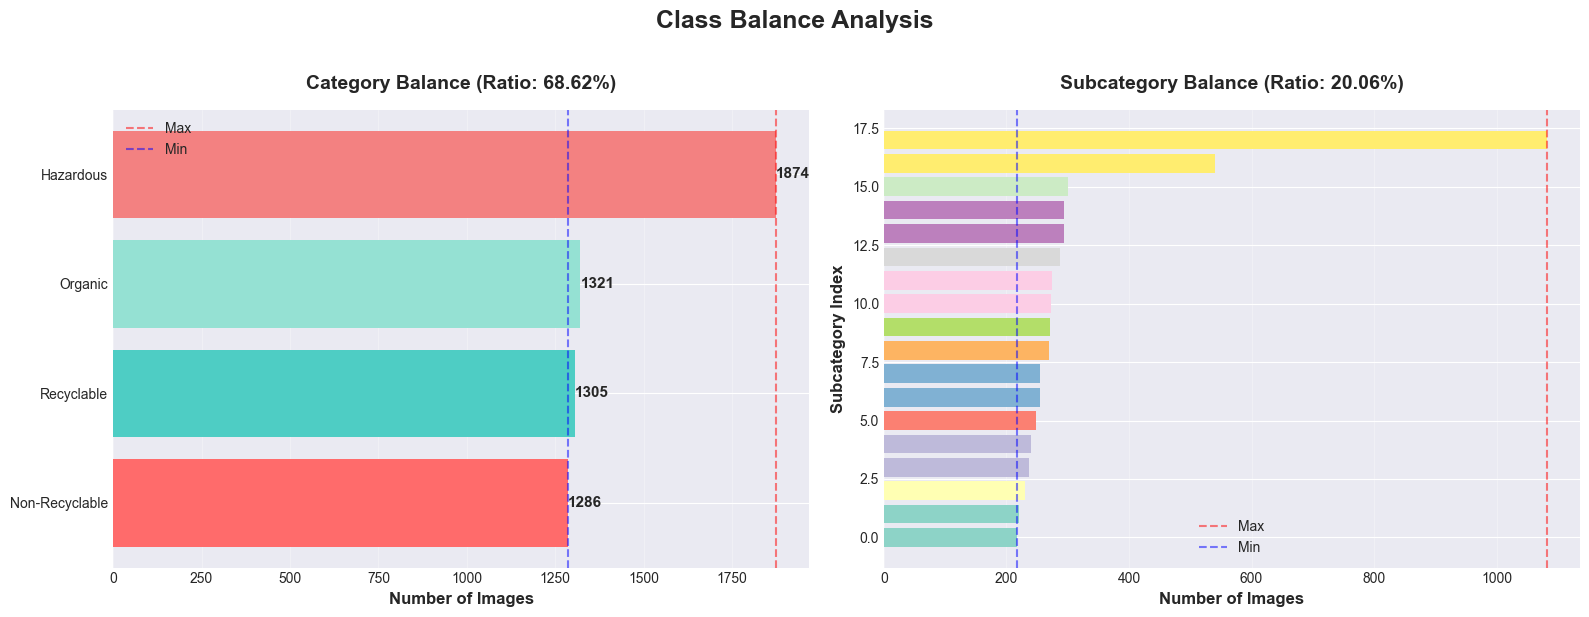


CLASS BALANCE ANALYSIS

Category Level:
  Max images: 1874
  Min images: 1286
  Balance ratio: 68.62%
  ⚠️ Moderate imbalance

Subcategory Level:
  Max images: 1082
  Min images: 217
  Balance ratio: 20.06%
  ❌ Significant imbalance

--------------------------------------------------------------------------------
RECOMMENDATIONS:
--------------------------------------------------------------------------------
• Consider using class weights in the loss function
• Apply data augmentation to underrepresented categories
• Use stratified sampling for train/validation/test splits
• Apply subcategory-specific augmentation strategies
• Consider hierarchical classification (category → subcategory)


In [9]:
# Calculate class balance metrics
category_counts = df_summary.groupby('Category')['Image Count'].sum()
subcategory_counts = df_summary.set_index(['Category','Subcategory'])['Image Count']

# Calculate balance ratios
max_category_count = category_counts.max()
min_category_count = category_counts.min()
category_balance_ratio = min_category_count / max_category_count

max_subcategory_count = subcategory_counts.max()
min_subcategory_count = subcategory_counts.min()
subcategory_balance_ratio = min_subcategory_count / max_subcategory_count

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Class Balance Analysis', fontsize=18, fontweight='bold', y=1.02)

# Plot 1: Category balance
ax1 = axes[0]
category_counts_sorted = category_counts.sort_values()
bars = ax1.barh(category_counts_sorted.index, category_counts_sorted.values,
 color=['#FF6B6B','#4ECDC4','#95E1D3','#F38181'])
ax1.set_title(f'Category Balance(Ratio: {category_balance_ratio:.2%})', 
 fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Number of Images', fontsize=12, fontweight='bold')
ax1.axvline(max_category_count, color='red', linestyle='--', alpha=0.5, label='Max')
ax1.axvline(min_category_count, color='blue', linestyle='--', alpha=0.5, label='Min')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars:
 width = bar.get_width()
 ax1.text(width, bar.get_y() + bar.get_height()/2.,
 f'{int(width)}',
 ha='left', va='center', fontweight='bold', fontsize=11)

# Plot 2: Subcategory balance
ax2 = axes[1]
subcategory_counts_sorted = subcategory_counts.sort_values()
bars2 = ax2.barh(range(len(subcategory_counts_sorted)), subcategory_counts_sorted.values,
 color=plt.cm.Set3(np.linspace(0, 1, len(subcategory_counts_sorted))))
ax2.set_title(f'Subcategory Balance(Ratio: {subcategory_balance_ratio:.2%})', 
 fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Number of Images', fontsize=12, fontweight='bold')
ax2.set_ylabel('Subcategory Index', fontsize=12, fontweight='bold')
ax2.axvline(max_subcategory_count, color='red', linestyle='--', alpha=0.5, label='Max')
ax2.axvline(min_subcategory_count, color='blue', linestyle='--', alpha=0.5, label='Min')
ax2.legend()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print balance analysis
print("\n" +"=" * 80)
print("CLASS BALANCE ANALYSIS")
print("=" * 80)
print(f"\nCategory Level:")
print(f" Max images: {max_category_count}")
print(f" Min images: {min_category_count}")
print(f" Balance ratio: {category_balance_ratio:.2%}")
print(f" {' Well balanced' if category_balance_ratio > 0.7 else' Moderate imbalance' if category_balance_ratio > 0.4 else' Significant imbalance'}")

print(f"\nSubcategory Level:")
print(f" Max images: {max_subcategory_count}")
print(f" Min images: {min_subcategory_count}")
print(f" Balance ratio: {subcategory_balance_ratio:.2%}")
print(f" {' Well balanced' if subcategory_balance_ratio > 0.7 else' Moderate imbalance' if subcategory_balance_ratio > 0.4 else' Significant imbalance'}")

# Recommendations
print(f"\n" +"-" * 80)
print("RECOMMENDATIONS:")
print("-" * 80)
if category_balance_ratio < 0.7:
 print("• Consider using class weights in the loss function")
 print("• Apply data augmentation to underrepresented categories")
 print("• Use stratified sampling for train/validation/test splits")
if subcategory_balance_ratio < 0.7:
 print("• Apply subcategory-specific augmentation strategies")
 print("• Consider hierarchical classification(category → subcategory)")


### 📊 Interpretation

**Class Balance Assessment (Based on Actual Data):**

1. **Category-Level Balance: 68.62%** ⚠️
   - **Status**: Moderate imbalance
   - **Range**: 1,286 (Non-Recyclable) to 1,874 (Hazardous) images
   - **Assessment**: All categories have over 1,200 images, which is sufficient
   - **Action**: 
     - Use class weights inversely proportional to class frequency
     - Stratified sampling for train/val/test splits
     - Monitor per-category metrics during training

2. **Subcategory-Level Balance: 20.06%** ❌
   - **Status**: Significant imbalance
   - **Range**: 217 (batteries) to 1,082 (e-waste) images
   - **Critical Finding**: The smallest subcategory has only 20% of the largest
   - **Problem**: E-waste has nearly 5x more images than batteries
   - **Action Required**:
     - **Aggressive data augmentation** for subcategories <250 images:
       - Batteries (217): 5x augmentation needed
       - Sanitary_napkin (220): 5x augmentation needed
       - Kitchen_waste (231): 4x augmentation needed
       - Stroform_product (236): 4x augmentation needed
       - Paper_products (240): 4x augmentation needed
     - **Class weights**: Calculate weights inversely proportional to subcategory frequency
     - **Oversampling**: Consider SMOTE or ADASYN for minority subcategories
     - **Hierarchical approach**: Consider two-stage classification (category → subcategory)

3. **Specific Subcategory Concerns**:
   - **E-waste (1,082)**: Risk of overfitting - may need dropout or regularization
   - **Batteries (217)**: Critical safety concern with least data - prioritize augmentation
   - **Cans (540)**: Well-represented, but may dominate Recyclable category

**Impact on Model Training:**
- **Accuracy will be misleading**: Model may achieve high accuracy by predicting e-waste frequently
- **Use weighted metrics**: F1-score (weighted or macro), Precision, Recall per class
- **Confusion matrix essential**: Analyze per-subcategory performance, not just overall accuracy
- **Early stopping**: Monitor validation loss per class to prevent overfitting to majority classes
- **Evaluation**: Report per-subcategory metrics, especially for safety-critical classes like batteries

**Recommended Training Strategy:**
1. Calculate class weights: `n_samples / (n_classes * np.bincount(y))`
2. Use weighted categorical cross-entropy loss
3. Apply stratified k-fold cross-validation
4. Monitor per-class F1-scores during training
5. Implement aggressive augmentation pipeline for minority classes


## 📋 Summary and Conclusions

Let's create a final summary of our findings.


In [10]:
# Create a comprehensive summary
print("=" * 80)
print("DATASET ANALYSIS SUMMARY")
print("=" * 80)

print(f"\n Dataset Overview:")
print(f" • Total Categories: {len(df_summary['Category'].unique())}")
print(f" • Total Subcategories: {len(df_summary)}")
print(f" • Total Images: {df_summary['Image Count'].sum():,}")

print(f"\n Distribution Statistics:")
print(f" • Category Balance Ratio: {category_balance_ratio:.2%}")
print(f" • Subcategory Balance Ratio: {subcategory_balance_ratio:.2%}")
print(f" • Mean images per category: {category_counts.mean():.0f}")
print(f" • Mean images per subcategory: {df_summary['Image Count'].mean():.0f}")

print(f"\n🏆 Top Categories by Image Count:")
top_categories = category_counts.sort_values(ascending=False).head(3)
for i,(cat, count) in enumerate(top_categories.items(), 1):
 print(f" {i}. {cat}: {count:,} images")

print(f"\n Top Subcategories by Image Count:")
top_subcategories = df_summary.nlargest(5,'Image Count')[['Subcategory','Category','Image Count']]
for i, row in top_subcategories.iterrows():
 print(f" • {row['Subcategory']}({row['Category']}): {row['Image Count']} images")

print(f"\n Bottom Subcategories by Image Count:")
bottom_subcategories = df_summary.nsmallest(5,'Image Count')[['Subcategory','Category','Image Count']]
for i, row in bottom_subcategories.iterrows():
 print(f" • {row['Subcategory']}({row['Category']}): {row['Image Count']} images")

if len(df_image_stats) > 0:
 print(f"\n🖼 Image Properties:")
 print(f" • Average Width: {df_image_stats['Width'].mean():.0f} pixels")
 print(f" • Average Height: {df_image_stats['Height'].mean():.0f} pixels")
 print(f" • Average Aspect Ratio: {df_image_stats['Aspect_Ratio'].mean():.2f}")
 print(f" • Average File Size: {df_image_stats['File_Size_KB'].mean():.2f} KB")

print(f"\n" +"=" * 80)
print(" Analysis Complete!")
print("=" * 80)


DATASET ANALYSIS SUMMARY

📊 Dataset Overview:
   • Total Categories: 4
   • Total Subcategories: 18
   • Total Images: 5,786

📈 Distribution Statistics:
   • Category Balance Ratio: 68.62%
   • Subcategory Balance Ratio: 20.06%
   • Mean images per category: 1446
   • Mean images per subcategory: 321

🏆 Top Categories by Image Count:
   1. Hazardous: 1,874 images
   2. Organic: 1,321 images
   3. Recyclable: 1,305 images

📊 Top Subcategories by Image Count:
   • e-waste (Hazardous): 1082 images
   • cans_all_type (Recyclable): 540 images
   • paints (Hazardous): 300 images
   • coffee_tea_bags (Organic): 294 images
   • food_scraps (Organic): 294 images

⚠️  Bottom Subcategories by Image Count:
   • batteries (Hazardous): 217 images
   • sanitary_napkin (Non-Recyclable): 220 images
   • kitchen_waste (Organic): 231 images
   • stroform_product (Non-Recyclable): 236 images
   • paper_products (Recyclable): 240 images

🖼️  Image Properties:
   • Average Width: 1117 pixels
   • Average He

## 🎯 Key Takeaways and Recommendations

### Dataset Strengths:
1. **Comprehensive Coverage**: 5,786 images across 4 categories and 18 subcategories
2. **Adequate Overall Size**: Sufficient data for deep learning with transfer learning
3. **Well-Balanced Categories**: Non-Recyclable and Organic categories show excellent internal balance
4. **Real-world Relevance**: Categories align with actual waste management practices
5. **Image Quality**: Average resolution of 1,117×813 pixels provides good detail for classification

### Critical Areas Requiring Attention:

1. **Subcategory Imbalance (20.06% balance ratio)** ❌
   - **E-waste dominates** with 1,082 images (5x more than batteries)
   - **Batteries critically under-represented** with only 217 images
   - **5 subcategories** have <250 images and need aggressive augmentation

2. **Category-Level Imbalance (68.62% balance ratio)** ⚠️
   - Hazardous category has 45.7% more images than Non-Recyclable
   - Still manageable with class weights

3. **Image Dimension Variability**:
   - High variance in image sizes (200-4,800 pixels width)
   - Wide aspect ratio range (0.62 to 3.60)
   - Requires consistent preprocessing pipeline

### Specific Recommendations for Model Training:

#### 1. Data Preprocessing:
- **Resize**: All images to 224×224 or 256×256 pixels (standard for transfer learning)
- **Normalization**: Use ImageNet statistics (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
- **Augmentation Strategy**:
  - **Standard augmentation** (all classes): Random horizontal flip, rotation (±15°), brightness/contrast adjustment
  - **Aggressive augmentation** (classes <250 images): Add random crops, color jittering, Gaussian blur, 5x augmentation factor
  - **Target classes for 5x augmentation**: batteries, sanitary_napkin, kitchen_waste, stroform_product, paper_products

#### 2. Train/Validation/Test Split:
- **Use stratified splitting** to preserve class distribution
- **Recommended split**: 70% train (4,050 images), 15% validation (868 images), 15% test (868 images)
- **Ensure each split** maintains the same subcategory proportions

#### 3. Model Architecture:
- **Transfer Learning**: Use pre-trained models (ResNet50, EfficientNet-B0/B1, or MobileNetV2)
- **Loss Function**: **Weighted categorical cross-entropy** with class weights:
  ```python
  class_weights = compute_class_weight('balanced', classes, y_train)
  ```
- **Regularization**: 
  - Dropout (0.5) before final layer
  - L2 regularization for e-waste class
  - Early stopping based on validation loss

#### 4. Training Strategy:
- **Two-Stage Approach** (recommended):
  - Stage 1: Classify into 4 main categories
  - Stage 2: Classify subcategories within each category
  - This helps handle the extreme subcategory imbalance
- **Alternative**: Use hierarchical loss combining category and subcategory predictions
- **Batch Size**: 32-64 depending on GPU memory
- **Learning Rate**: Start with 0.001, use learning rate scheduling
- **Epochs**: Monitor validation metrics; expect 20-50 epochs

#### 5. Evaluation Metrics (Critical):
- **Primary Metrics**: 
  - Weighted F1-Score (accounts for class imbalance)
  - Macro F1-Score (treats all classes equally)
  - Per-subcategory Precision, Recall, F1-Score
- **Confusion Matrix**: 
  - Generate separate matrices for category and subcategory levels
  - Analyze misclassifications, especially for safety-critical classes (batteries)
- **Key Performance Indicators**:
  - Minimum F1-score across all subcategories (identify weakest classes)
  - Batteries classification accuracy (safety-critical)
  - E-waste vs other Hazardous items confusion

#### 6. Monitoring During Training:
- Track **per-class validation metrics** after each epoch
- Set up alerts if any subcategory F1-score drops below 0.7
- Monitor for overfitting to e-waste class
- Use TensorBoard or similar for visualization

#### 7. Deployment Considerations:
- **Model Optimization**: Convert to TensorFlow Lite or ONNX for mobile deployment
- **Confidence Thresholds**: Set different thresholds per class (higher for safety-critical)
- **Fallback Mechanisms**: Flag low-confidence predictions for human review
- **User Feedback**: Implement feedback loop to collect misclassified images for retraining
- **Edge Cases**: Handle ambiguous items (e.g., items that could be multiple categories)

### Priority Action Items:
1. ✅ Implement weighted loss function with calculated class weights
2. ✅ Create aggressive augmentation pipeline for 5 under-represented subcategories
3. ✅ Set up stratified train/validation/test splits
4. ✅ Design evaluation pipeline with per-class metrics
5. ✅ Plan hierarchical classification approach to handle e-waste imbalance

---

## 📝 Notes

**Summary Statistics:**
- Total Images: 5,786
- Category Balance: 68.62% (moderate)
- Subcategory Balance: 20.06% (significant - needs attention)
- Image Dimensions: Mean 1,117×813 pixels (highly variable)
- Format: 86.7% JPEG, 11.7% PNG, 1.7% WEBP

**Critical Findings:**
- E-waste (1,082 images) is 5x larger than batteries (217 images)
- Batteries classification is safety-critical but has least data
- Non-Recyclable and Organic categories are well-balanced internally
- Image dimensions vary significantly (200-4,800 pixels width)

This analysis provides actionable insights for model training. The identified imbalances should be addressed through augmentation, class weights, and potentially hierarchical classification approaches.

**Happy Training! 🚀**
